In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

C:\Users\jmphe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\jmphe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\jmphe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\jmphe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
nifty_data = pd.read_csv('Dataset/HDFC.csv')

In [3]:
nifty_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFC,EQ,271.75,293.5,293.50,293.5,293.5,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
1,2000-01-04,HDFC,EQ,293.50,317.0,317.00,297.0,304.0,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2,2000-01-05,HDFC,EQ,304.05,290.0,303.90,285.0,295.0,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
3,2000-01-06,HDFC,EQ,292.80,301.0,314.00,295.0,296.0,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
4,2000-01-07,HDFC,EQ,296.45,290.0,296.35,281.0,287.1,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN


In [4]:
nifty_data.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,HDFC,EQ,2497.35,2500.00,2534.1,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.0,2440395.0,0.6232
5302,2021-04-27,HDFC,EQ,2509.80,2494.15,2526.8,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
5303,2021-04-28,HDFC,EQ,2518.40,2516.10,2609.0,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.0,1815110.0,0.5327
5304,2021-04-29,HDFC,EQ,2577.00,2590.90,2628.0,2533.00,2539.70,2538.85,2569.65,3005468,7.722995e+14,132826.0,1472924.0,0.4901
5305,2021-04-30,HDFC,EQ,2538.85,2503.10,2525.0,2411.10,2433.25,2420.10,2445.94,6024595,1.473581e+15,224454.0,3839105.0,0.6372


In [5]:
nifty_data.shape

(5306, 15)

In [6]:
nifty_data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1283.666114,1284.393074,1304.269732,1263.297842,1283.885017,1284.071005,1283.664578,1.848187e+06,2.620759e+14,102159.051303,1.329440e+06,0.653088
std,709.395090,709.703665,721.308080,697.450309,709.250204,709.430515,709.109622,2.991387e+06,3.607844e+14,57948.603200,2.555073e+06,0.128115
min,271.750000,284.000000,290.500000,273.250000,282.850000,283.850000,283.600000,2.919000e+03,1.834686e+11,973.000000,1.786000e+03,0.119000
25%,668.650000,669.712500,677.512500,660.000000,669.000000,668.662500,668.265000,3.034970e+05,2.461178e+13,62011.500000,2.688070e+05,0.575200
50%,1136.275000,1135.400000,1156.725000,1119.000000,1135.000000,1136.675000,1136.720000,1.337788e+06,1.684207e+14,90405.000000,1.021574e+06,0.666900
75%,1811.475000,1813.812500,1835.000000,1783.075000,1812.000000,1811.787500,1811.680000,2.732310e+06,3.419282e+14,129754.500000,1.939101e+06,0.742000
max,3180.150000,3148.000000,3262.000000,3100.550000,3178.000000,3180.150000,3166.580000,1.584141e+08,1.043773e+16,538170.000000,1.483131e+08,0.989400


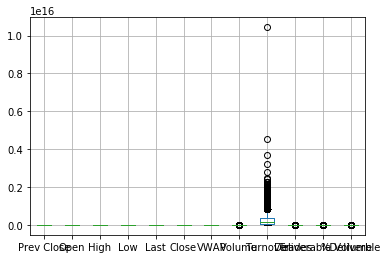

In [7]:
nifty_data.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000252A3CF6208>,
      dtype=object)

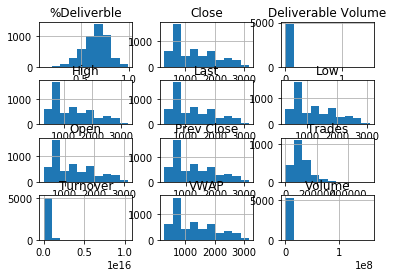

In [8]:
nifty_data.hist()

In [9]:
nifty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [10]:
nifty_data.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

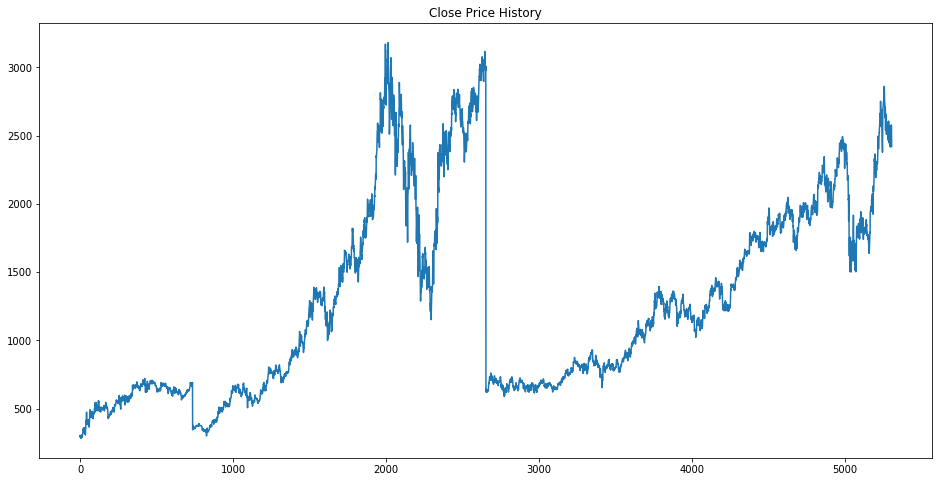

In [11]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(nifty_data.Close)
plt.show()


In [12]:
data = nifty_data.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

4245

In [13]:
#Scaling the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00333184],
       [0.00697442],
       [0.00309015],
       ...,
       [0.79175155],
       [0.77857957],
       [0.73757898]])

In [14]:
#Scaling the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00333184],
       [0.00697442],
       [0.00309015],
       ...,
       [0.79175155],
       [0.77857957],
       [0.73757898]])

In [15]:
#Scaling the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00333184],
       [0.00697442],
       [0.00309015],
       ...,
       [0.79175155],
       [0.77857957],
       [0.73757898]])

In [16]:
#Scaling the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00333184],
       [0.00697442],
       [0.00309015],
       ...,
       [0.79175155],
       [0.77857957],
       [0.73757898]])

In [17]:
train_data = scaled_data[0:training_data_len, :]
#spliting 
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])  
    y_train.append(train_data[i,0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

    

[array([0.00333184, 0.00697442, 0.00309015, 0.00435038, 0.00093222,
       0.00115665, 0.        , 0.00060422, 0.        , 0.00093222,
       0.00633567, 0.00756137, 0.00738874, 0.00258951, 0.00542071,
       0.00317647, 0.00666367, 0.01130753, 0.01400062, 0.01714256,
       0.02302938, 0.02332286, 0.02004281, 0.02532542, 0.0247212 ,
       0.02301212, 0.01564064, 0.01260229, 0.02064703, 0.02599869,
       0.01683182, 0.01993923, 0.01911059, 0.01520906, 0.01218796,
       0.00763043, 0.01608949, 0.02342644, 0.03314574, 0.04345199,
       0.04068985, 0.05179022, 0.06378828, 0.06532472, 0.05512205,
       0.04431516, 0.04586887, 0.03996478, 0.03925698, 0.03374996,
       0.03894624, 0.04027552, 0.03948141, 0.04229534, 0.04467769,
       0.04350378, 0.04590339, 0.04611055, 0.04448779, 0.03330111])]
[0.027621448054414258]



In [18]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
#reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4185, 60, 1)

In [20]:
#build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
#train model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


4185/4185 [==============================] - 395s 94ms/sample - loss: 0.0019


In [23]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [24]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [25]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [26]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

12.103705553060204

C:\Users\jmphe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


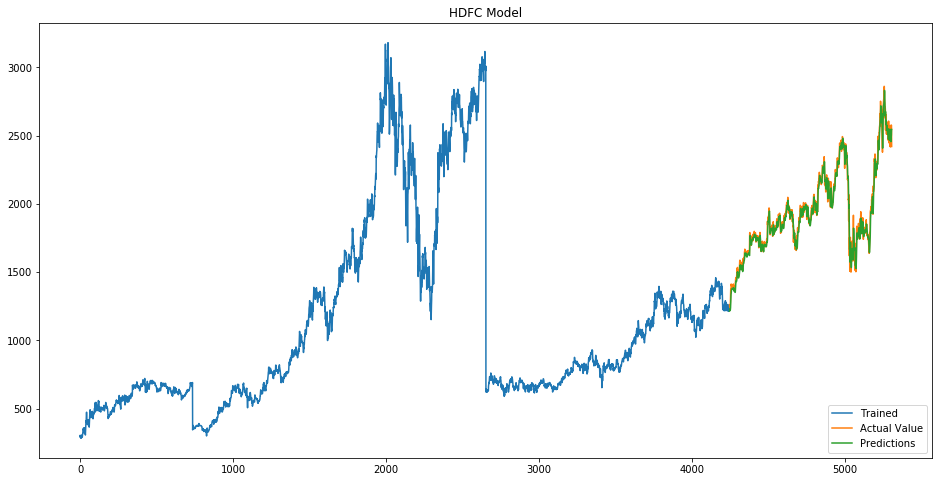

In [27]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
plt.figure(figsize = (16, 8))
plt.title('HDFC Model')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Trained','Actual Value', 'Predictions' ], loc= 'lower right')
plt.show()

In [28]:
valid

,Close,predictions
4245,1256.90,1213.528687
4246,1245.80,1224.696289
4247,1249.05,1227.519287
4248,1242.40,1228.203735
4249,1237.30,1225.341797
...,...,...
5301,2509.80,2467.911621
5302,2518.40,2487.407471
5303,2577.00,2504.262451
5304,2538.85,2539.712158
